In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 22.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2 
from ultralytics import YOLO
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/vaishnavishinde/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


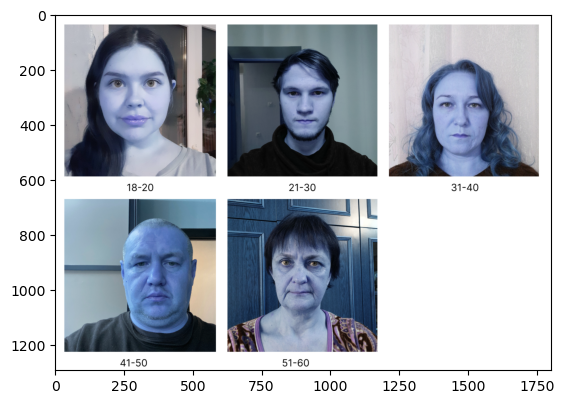

In [41]:
model = YOLO('yolov8n.pt')
image_path='dataset.png'
image = cv2.imread(image_path)
plt.imshow(image)

In [42]:
results = model(image)
results


0: 480x640 5 persons, 218.4ms
Speed: 11.1ms preprocess, 218.4ms inference, 28.2ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [43]:
img_cp = image.copy()

In [54]:
for result in results:
    boxes = result.boxes
    for box in boxes:
        # print('BOX\n ', box)
        cls_id= int(box.cls[0])
        conf = int(box.conf[0])
        x1,y1,x2,y2 = box.xyxy[0]
        print(x1,y1,x2,y2)
        if cls_id == 0: 
            cv2.rectangle(img_cp, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,255), 6)
            cv2.putText(img_cp, f"Person {conf:.2f}", (int(x1), int(y1)-10), cv2.FONT_HERSHEY_COMPLEX, 0.6, (0,255,0), 2)

tensor(628.0978) tensor(123.2721) tensor(1170.1105) tensor(581.8176)
tensor(626.8911) tensor(717.5273) tensor(1171.3868) tensor(1226.1206)
tensor(40.3182) tensor(45.5593) tensor(582.2824) tensor(582.5576)
tensor(1213.8173) tensor(160.0731) tensor(1758.4816) tensor(584.3941)
tensor(36.6204) tensor(737.9984) tensor(583.9052) tensor(1225.0007)


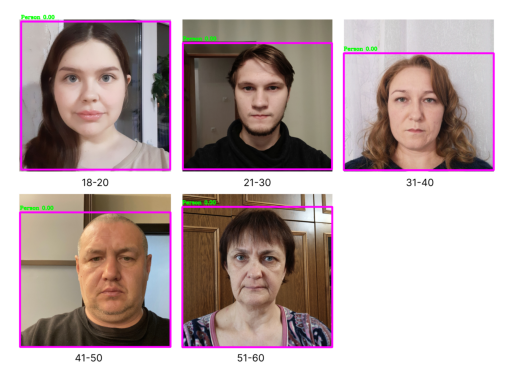

In [55]:
image_rgb = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()